# Using ARC package for simple known H calculations

I will use the ARC functions to compare the results with well known theory results of H spectral lines and familiarise with these functions so I can apply them to more complex calculations in other notebooks.

In [2]:
# Import the arc package
from arc import *

In [3]:
# Create our Hydrogen atom
atom = Hydrogen()

## Lyman Series

Lyman series are hydrogen spectral series of transitions from:
$$ n \geq 2 $$ to the ground state $$ n = 1 $$ 
These transitions result in the emission of a photon in the ultraviolet spectrum. I am going to show using the ARC package the wavelenght of these emissions from n = 2 to n = 11

Next I plot the energy levels for n = 11 until n = 1, for l = 0 (subshell S - other subshell don't have transitions to the ground state)


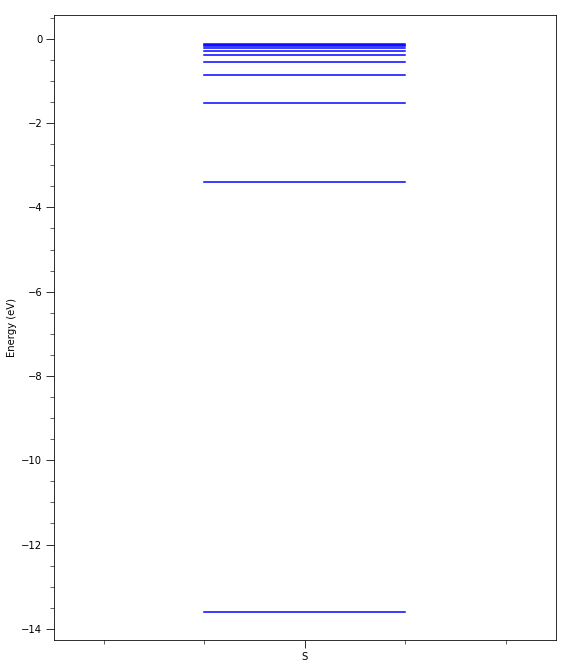

In [5]:
nmin=1  #Minimum n
nmax=11 #Maximum n
lmin=0  #Minimum l
lmax=0  #Maxmium l

#Plot Energy Levels of Hydrogen for Lyman series
levels = LevelPlot(atom)
levels.makeLevels(nmin,nmax,lmin,lmax)
levels.drawLevels()
levels.showPlot()


Calculate the wavelength for each transition

In [9]:
l=1
j=1.5
nf=1
lf=0
jf=0.5

for state in range(2,12):
    print("Transition %s to %s :\n" % (printStateString(state,l,j), printStateString(nf,lf,jf)))
    print(atom.getTransitionWavelength(state,l,j,nf,lf,jf))  # returns value in units of m
    print("\tTransition wavelength:\t%.3f nm"
      % (atom.getTransitionWavelength(state,l,j,nf,lf,jf) * 1e9) )  # convert m into nm
    print("\tTransition frequency:\t%.3f GHz"
      % (atom.getTransitionFrequency(state, l, j, nf, lf, jf)*1e-9) ) # convert Hz into GHz
    print("\tTransition energy:\t%.2e eV\n"
      % (atom.getEnergy(nf,lf,jf) - atom.getEnergy(state,l,j)))

Transition 2 P 3/2 to 1 S 1/2 :

-1.2156682372262695e-07
	Transition wavelength:	-121.567 nm
	Transition frequency:	-2466071.325 GHz
	Transition energy:	-1.02e+01 eV

Transition 3 P 3/2 to 1 S 1/2 :

-1.0257218249917637e-07
	Transition wavelength:	-102.572 nm
	Transition frequency:	-2922746.213 GHz
	Transition energy:	-1.21e+01 eV

Transition 4 P 3/2 to 1 S 1/2 :

-9.725365943855955e-08
	Transition wavelength:	-97.254 nm
	Transition frequency:	-3082582.802 GHz
	Transition energy:	-1.27e+01 eV

Transition 5 P 3/2 to 1 S 1/2 :

-9.497429092567824e-08
	Transition wavelength:	-94.974 nm
	Transition frequency:	-3156564.319 GHz
	Transition energy:	-1.31e+01 eV

Transition 6 P 3/2 to 1 S 1/2 :

-9.378033612514112e-08
	Transition wavelength:	-93.780 nm
	Transition frequency:	-3196751.797 GHz
	Transition energy:	-1.32e+01 eV

Transition 7 P 3/2 to 1 S 1/2 :

-9.307481752569507e-08
	Transition wavelength:	-93.075 nm
	Transition frequency:	-3220983.570 GHz
	Transition energy:	-1.33e+01 eV

Transi